In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

# 1. Download the dataset

In [131]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# 2. Load the dataset

In [132]:
data = pd.read_csv("/drive/My Drive/Parkinson/Churn_Modelling.csv")

In [134]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [135]:
#display first 10 rows
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [136]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [137]:
#unique feature - Geography
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [138]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [139]:
data["IsActiveMember"].unique()

array([1, 0])

In [140]:
# To display the bottom of the dataset
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# 3. Perform visualizations

### Univariate Analysis

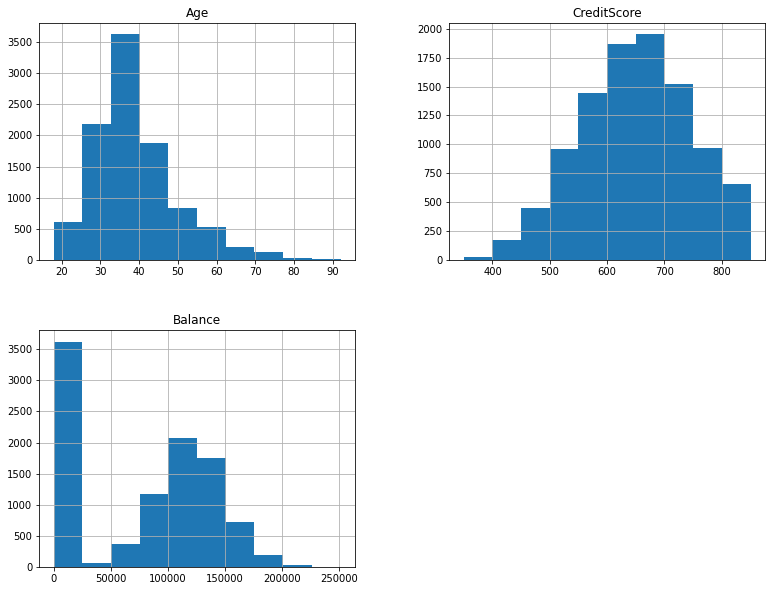

In [141]:
# Univariate analysis
features =['Age','CreditScore', 'Balance']
data[features].hist(figsize=(13, 10));

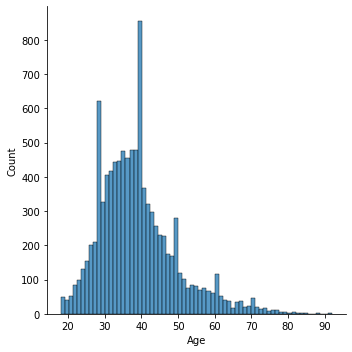

In [142]:
sns.displot(data["Age"])

In [143]:
import warnings
warnings.filterwarnings("ignore")

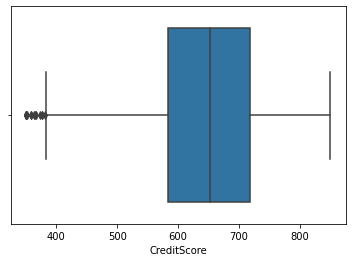

In [144]:
sns.boxplot(data["CreditScore"])

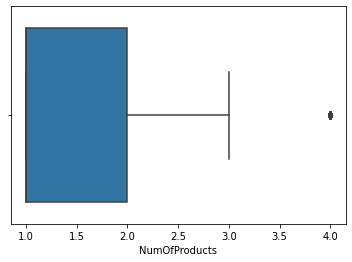

In [145]:
sns.boxplot(data["NumOfProducts"])

### Bi-variate analysis

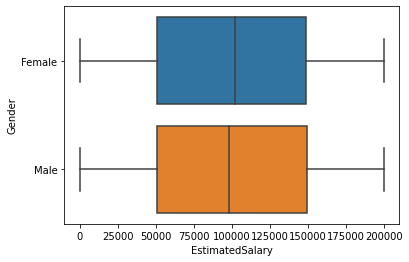

In [146]:
# Bi-variate analysis

sns.boxplot(x = data['EstimatedSalary'], y = data['Gender'] );

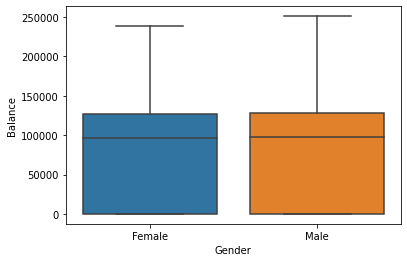

In [147]:
sns.boxplot(x=data['Gender'],y=data['Balance']);

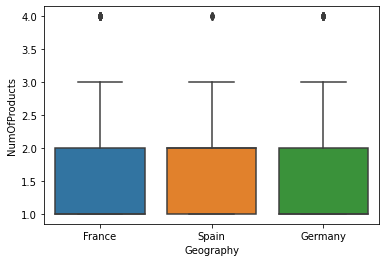

In [148]:
sns.boxplot(x=data['Geography'],y=data['NumOfProducts']);

### Multi-variate analysis

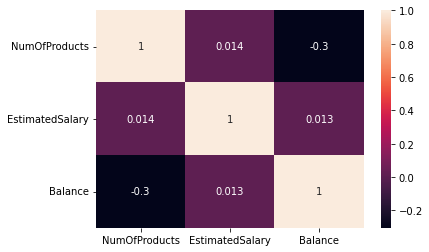

In [149]:
# Multi-variate analysis

# Correlation for "NumOfProducts","EstimatedSalary","Balance"

df= pd.DataFrame(data,columns=['NumOfProducts','EstimatedSalary','Balance'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

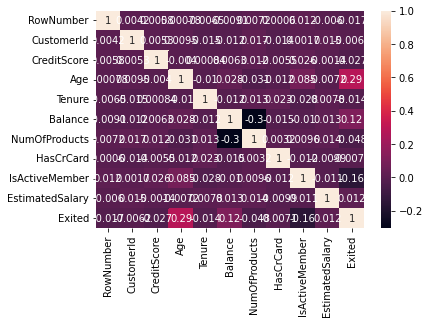

In [150]:
#correlation for all elements in dataset
sns.heatmap(data.corr(),annot = True)

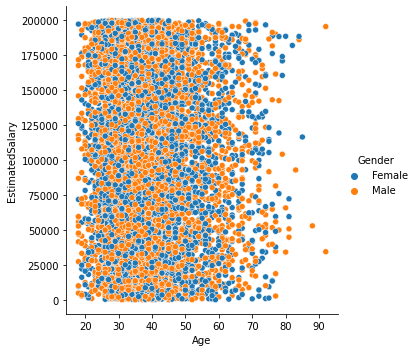

In [151]:
sns.relplot(x = "Age",y ="EstimatedSalary",hue="Gender",data=data)

# 4. Performing descriptive statistics on the dataset

In [152]:
data[['CreditScore','Balance','EstimatedSalary']].mean()

CreditScore           650.528800
Balance             76485.889288
EstimatedSalary    100090.239881
dtype: float64

In [153]:
data[['CreditScore','Balance','EstimatedSalary']].median()

CreditScore           652.000
Balance             97198.540
EstimatedSalary    100193.915
dtype: float64

In [154]:
data[['CreditScore','Balance','EstimatedSalary']].mode()

,CreditScore,Balance,EstimatedSalary
0,850,0.0,24924.92


In [155]:
# quantile
data[['CreditScore','Balance','EstimatedSalary']].quantile()

CreditScore           652.000
Balance             97198.540
EstimatedSalary    100193.915
Name: 0.5, dtype: float64

In [156]:
# standard Deviation
data[['CreditScore','Balance','EstimatedSalary']].std()

CreditScore           96.653299
Balance            62397.405202
EstimatedSalary    57510.492818
dtype: float64

In [157]:
#min
data[['CreditScore','Balance','EstimatedSalary']].min()

CreditScore        350.00
Balance              0.00
EstimatedSalary     11.58
dtype: float64

In [158]:
#max
data[['CreditScore','Balance','EstimatedSalary']].max()

CreditScore           850.00
Balance            250898.09
EstimatedSalary    199992.48
dtype: float64

In [159]:
#skew
data[['CreditScore','Balance','EstimatedSalary']].skew()

CreditScore       -0.071607
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [161]:
data.shape

(10000, 14)

In [162]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5. Handle the Missing values.

In [163]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#  6. Find the outliers and replace the outliers


In [164]:

def box_scatter(data, x, y): 
  fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
  sns.boxplot(data=data, x=x, ax=ax1)
  sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 19


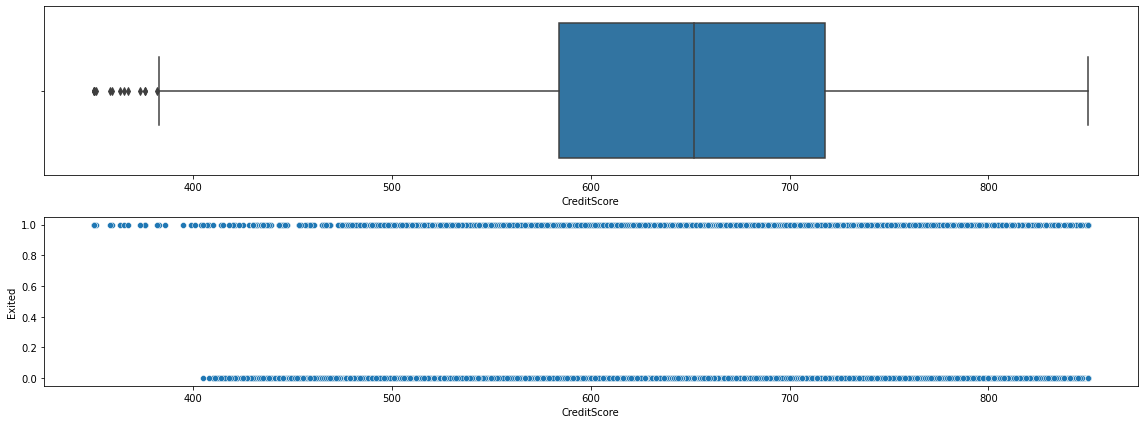

In [165]:
#Scatter and box plot
box_scatter(data,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


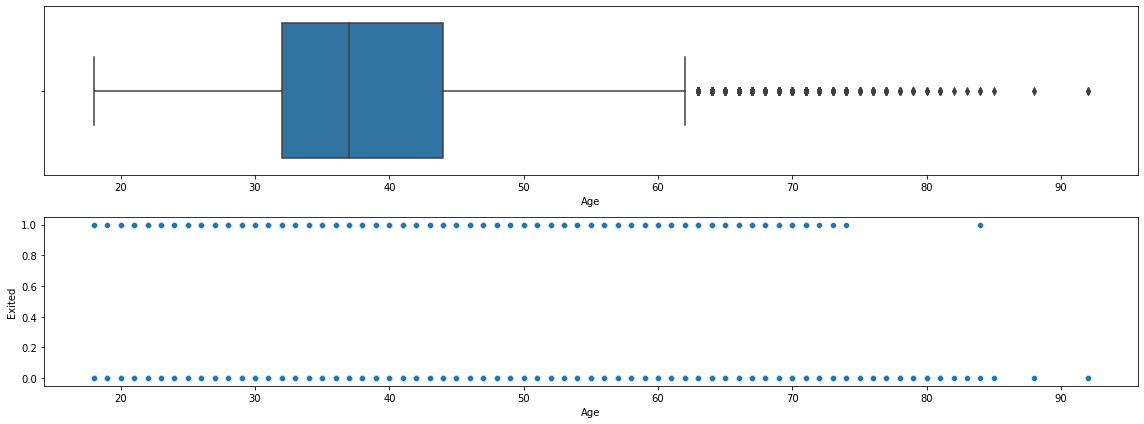

In [166]:

box_scatter(data,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Age'] > 87])}")

# of Bivariate Outliers: 4


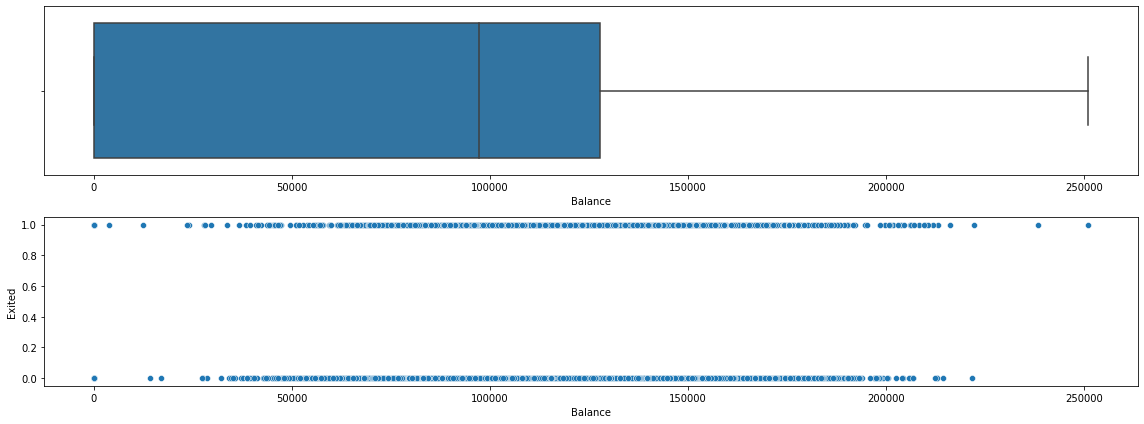

In [167]:
box_scatter(data,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Balance'] > 220000])}")

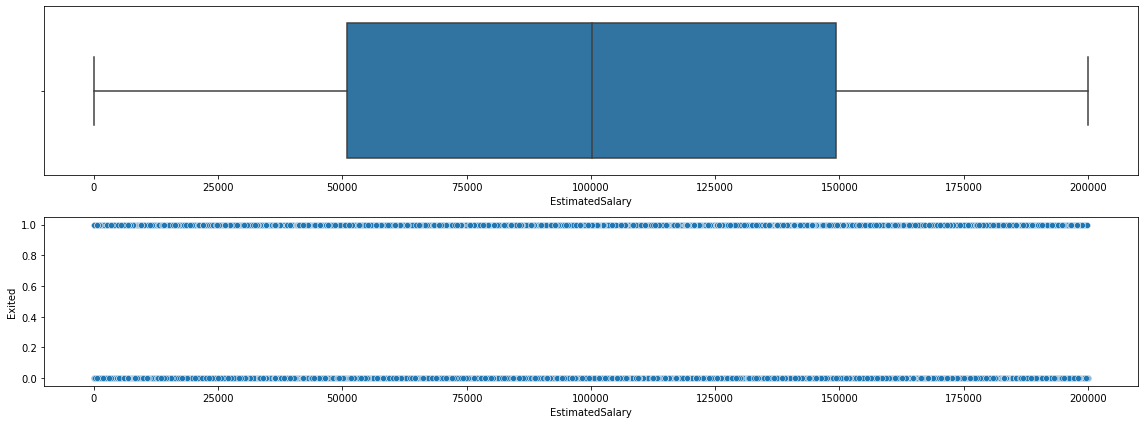

In [168]:
box_scatter(data,'EstimatedSalary','Exited');
plt.tight_layout()

In [169]:
for i in df:
  if df[i].dtype=='int64' or df[i].dtypes=='float64':
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df[i]=np.where(df[i] >upper, upper, df[i])
    df[i]=np.where(df[i] <lower, lower, df[i])

# of Bivariate Outliers: 19


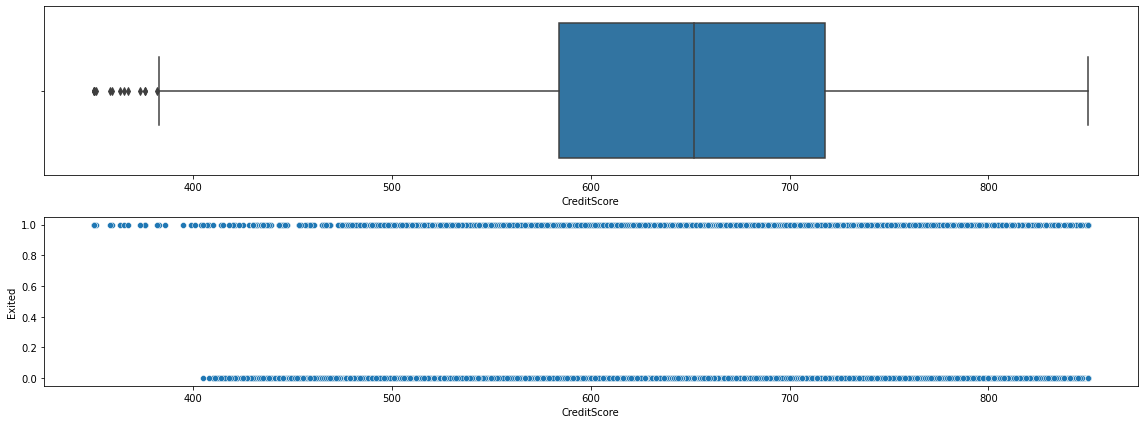

In [170]:
box_scatter(data,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['CreditScore'] < 400])}")

In [171]:
for i in data:
  if data[i].dtype=='int64' or data[i].dtypes=='float64':
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    data[i]=np.where(data[i] >upper, upper, data[i])
    data[i]=np.where(data[i] <lower, lower, data[i])

# of Bivariate Outliers: 19


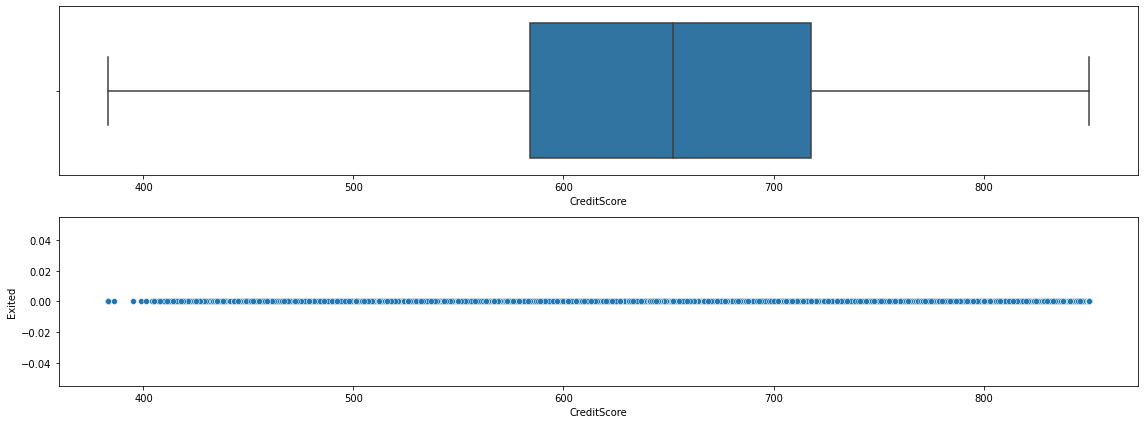

In [172]:
box_scatter(data,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


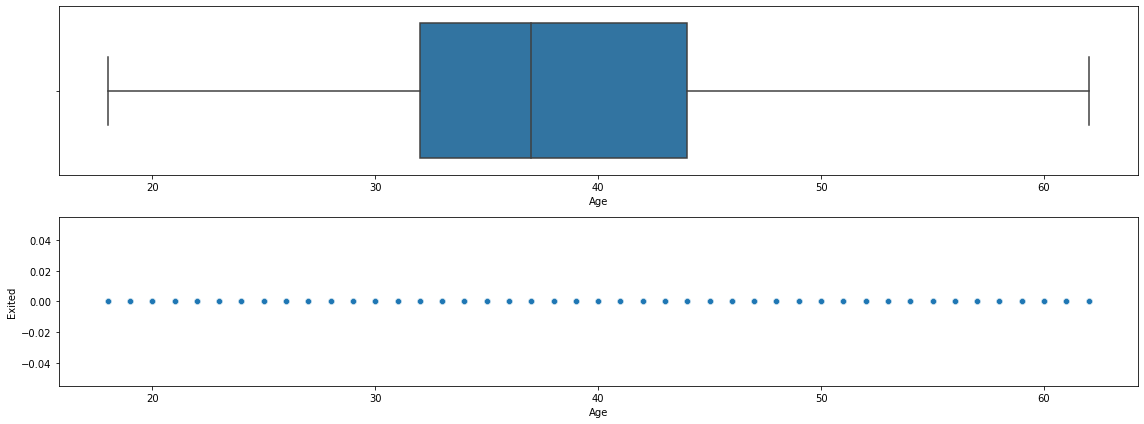

In [173]:
box_scatter(data,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Age'] > 87])}")

# of Bivariate Outliers: 4


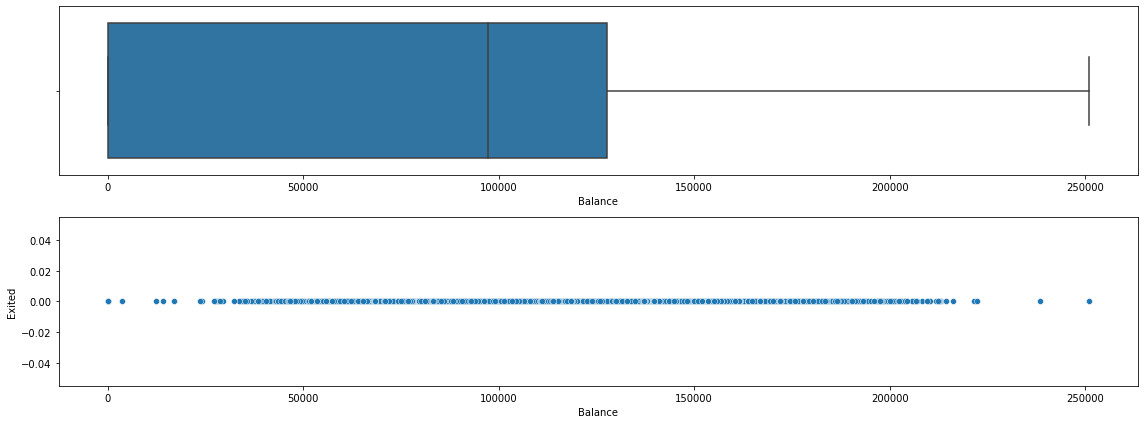

In [174]:
box_scatter(data,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Balance'] > 220000])}")

In [175]:
type(df)

pandas.core.frame.DataFrame

# 7. Check for Categorical columns and perform encoding.

In [176]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data:
  if data[i].dtype=='object' or data[i].dtype=='category':
    data[i]=encoder.fit_transform(data[i])

# 8. Split the data into dependent and independent variables.

In [177]:
x = data.iloc[:,:-1]
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,15634602.0,1115,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,2.0,15647311.0,1177,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,3.0,15619304.0,2040,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,4.0,15701354.0,289,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,5.0,15737888.0,1822,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [178]:
y=data.iloc[:-1]
y.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,1115,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0
1,2.0,15647311.0,1177,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,2040,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0
3,4.0,15701354.0,289,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,1822,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


# 9. Scale the independent variables

In [179]:
names = x.columns
names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [180]:
from sklearn.preprocessing import scale
X= scale(x)
X

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

# 10. Split the data into training and testing

In [181]:
X = pd.DataFrame(x,columns = names)
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,15634602.0,1115,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,2.0,15647311.0,1177,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,3.0,15619304.0,2040,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,4.0,15701354.0,289,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,5.0,15737888.0,1822,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,1999,771.0,0,1,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,9997.0,15569892.0,1336,516.0,0,1,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,9998.0,15584532.0,1570,709.0,0,0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,9999.0,15682355.0,2345,772.0,1,1,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [182]:
import numpy as np
x = np.array(X['CreditScore']).reshape(-1,1)

In [183]:
y

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,1115,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0
1,2.0,15647311.0,1177,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,2040,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0
3,4.0,15701354.0,289,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,1822,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995.0,15719294.0,2846,800.0,0,0,29.0,2.0,0.00,2.0,0.0,0.0,167773.55,0.0
9995,9996.0,15606229.0,1999,771.0,0,1,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,9997.0,15569892.0,1336,516.0,0,1,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,9998.0,15584532.0,1570,709.0,0,0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,0.0


### y has 9999 rows but x has 1000 rows. Transform y to have 10000 rows

In [184]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [185]:
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[8])],remainder='passthrough')
y=pd.DataFrame(df)

In [186]:
y

,NumOfProducts,EstimatedSalary,Balance
0,1.0,101348.88,0.00
1,1.0,112542.58,83807.86
2,3.0,113931.57,159660.80
3,2.0,93826.63,0.00
4,1.0,79084.10,125510.82
...,...,...,...
9995,2.0,96270.64,0.00
9996,1.0,101699.77,57369.61
9997,1.0,42085.58,0.00
9998,2.0,92888.52,75075.31


In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [124]:
x_train.shape

(7000, 1)

In [125]:
x_test.shape

(3000, 1)

In [126]:
y_train.shape

(7000, 3)

In [127]:
y_test.shape

(3000, 3)